In [4]:
import numpy as np 
ar_coef=np.array([.75,-.25])
ma_coef=np.array([.65,.35])
ar=np.r_[1,ar_coef]
ma=np.r_[1,ma_coef]
from statsmodels.tsa.arima_process import ArmaProcess
m = ArmaProcess(ar, ma)
print(type(m))

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


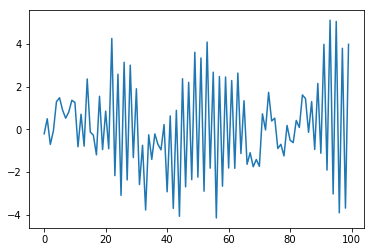

In [6]:
import matplotlib.pyplot as plt 
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

In [ ]:
import pandas as pd
import os
import statsmodels as sm
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib

matplotlib.rc('font', family="AppleGothic")   
os.chdir("/Users/youngji/Dropbox/data")
smp_price1=pd.read_csv("smp_price.csv",header=1,names=['육지(SMP)','제주(SMP)','SMP','BLMP'])
smp_price2=smp_price1.sort_index(axis=0, ascending=True)
smp_price3=smp_price2.set_index(keys=pd.period_range(start='2001-04',periods=smp_price2.shape[0],freq='M'))
smp_price4=smp_price3['SMP']
test_set=smp_price4.loc['2003-01':'2016-01']
train_set=smp_price4.loc['2016-01':'2016-12']
test_set.plot(title="SMP가격변화")
train_set.plot(title="SMP가격변화")
plt.show()

In [ ]:
## 모델별 수학적 증명 
이제 수학적으로 왜 이런 패턴을 보이는 것인지 각 모형별로 알아보자. ACF 및 PACF의 식은 아래와 같다. 
* 자기공분산: 
* 편자기공분산: $\gamma_x(t,1)=COV(y_t, y_1 \mid y_2 \cdots y_{t-1})$
* 편자기상관함수(PACF): $\rho(t,s)=\frac{\gamma_x(t,1)}{\gamma_x(t,t)\gamma_x(1,1)}$ 

### AR 모형 
AR모형의 식은 아래와 같다.
$$y_t=\phi_ty_t -\phi_{t-1}y_{t-1}-\cdots -\phi_{t-q}y_{t-q}$$

해당 모형을 자기상관함수식에 대응시켜보자.  
$$ E(\phi_ty_t -\cdots -\phi_{t-q}y_{t-q})E(\phi_ty_{t-q} -\cdots -\phi_{t-q-q}y_{t-q-q})$$ 

### MA 모형  
MA 모형은 아래와 같다. 
$$y_t=\mu+\theta_te_t -\theta_{t-1}e_{t-1}-\cdots -\theta_{t-q}e_{t-q}$$
해당 모형을 자기상관함수식에 대응시켜보자. 
$$y_t=E(\mu+\theta_te_t -\cdots -\theta_{t-q}e_{t-q})E(\mu+\theta_{t-q}e_{t-q} -\cdots -\theta_{t-q-q}e_{t-q-q}) $$ 
정상적인 확률이 맞다면 백색잡음은 0으로 수렴한다. 